# Homework 2: Gradient Methods in PyTorch

Name: Michael Dang

Email: ld8np@umsystem.edu

Partner Name(s) (if applicable): Karthik Chellamuthu

Partner Email(s) (if applicable):

### Submission instructions

- Submit the modified python notebook as homework submission.
- Group submission is enabled, you can submit this coding assignment with up to 2 other teammates in our class. For instruction of how to do a group submission. Go to People->Project group and you can sign up for groups.
- You can google answers on StackOverflow, please attach the corresponding StackOverflow answer as comments. However, if the answer is not converted to `torch` format, no credit will be awarded.
- You can ask answer in Large Language Model-based software such as Co-Pilot or ChatGPT. However, your code has to be runnable.
- Do not change the number of cells! Please work in the cell provided. If you need extra cells for debugging and testing purposes, we can work at the end of this notebook, save everything as a backup for review, and delete the extra cells in the submitted version.





### Instructions
Do **not** use `for` loops for tensorial operation purpose in any of our solutions! We are allowed to use `for` loops to compute gradient, etc.
Efficieny will be graded as well. For example if a problem asks us generate an array from 0 to 9: then
```python
x = []
for i in range(10):
    x.append(i)
```
this will only result a partial credit while
```python
x = torch.arange(10)
```
will yield a full score.

### Problems
Below are 4 problems that explore elementwise operations, matrix-vector multiplication, and gradient methods. Each problem gives examples demonstrating the concept and has an associated coding task with expected output(s). Complete the coding tasks for credit.

### Grading
This homework has 4 problems, 5 points each. The homework will be graded and the grade counts towards your course grade.

## Coding environments and submission
If we do not have `torch` installed on your computer, we have three ways to upload this notebook to [Google colab](https://colab.research.google.com/)：

1. Open up Google Colab, choose `Upload` to upload this template and work there. After we have done working we can select `File->Download .ipynb`.
2. Open up Google Colab, choose either `GitHub` or `Google Drive` to select the uploaded notebook in the corresponding website. After done working, we can sync the file to the corresponding GitHub or Google Drive copy.
3. Use the "Open in Colab" button at the top.


## Coding environments and submission
If we do not have `torch` installed on your computer, we have three ways to upload this notebook to [Google colab](https://colab.research.google.com/)：

1. Open up Google Colab, choose `Upload` to upload this template and work there. After we have done working we can select `File->Download .ipynb`.
2. Open up Google Colab, choose either `GitHub` or `Google Drive` to select the uploaded notebook in the corresponding website. After done working, we can sync the file to the corresponding GitHub or Google Drive copy.

In [2]:
# Run Me First
import torch
import torch.nn.functional as F

## Dataset


"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

In the following cells, we will learn how to load and view this dataset for our toy models.

Read more:[https://www.kaggle.com/c/digit-recognizer](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>


----
This code is adopted from the pytorch examples repository.
It is licensed under BSD 3-Clause "New" or "Revised" License.
Source: https://github.com/pytorch/examples/
LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

In [3]:
# import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
# import packages that help us plot
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# download the data
train = datasets.MNIST('../data', train=True, download=True, transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 147996295.24it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 21122178.52it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41389474.10it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4637421.80it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [6]:
loader = DataLoader(train, batch_size=1, shuffle=False)

In [7]:
data_iter = iter(loader) # set the loader to be an iterator
images, labels = next(data_iter) # next returns the next item in an iterator

`image` is now a `28x28` matrix, with entries varying between 0 and 1. Once being plotted by `plt.imshow` function as a `28x28` image, each pixel's brightness is decided by the matrix's entry value. Here axes are used but we can always just call `plt.imshow` instead.

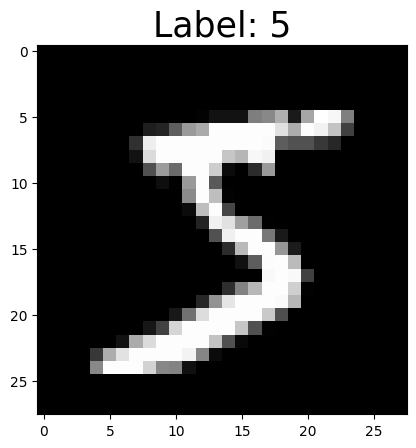

In [8]:
image = images[0].squeeze()
label = labels.squeeze()
_, ax = plt.subplots(1)
ax.imshow(image, cmap='gray');
ax.set_title(f'Label: {label}', color= 'black', fontsize=25);

## Data manipulation in higher dimensions

Load more images with label 8 using the following code.

In [9]:
idx = (train.targets==8)
labels_new = train.targets[idx]
data = train.data[idx]/255

Now we randomly pick the first 10 of them, notice the shape of the data should be `(10, 28, 28)` whereas the dimension 0 (axis 0) represents the indices of the image.

In [10]:
idx = torch.arange(10)
data_new = data[idx]
print(data_new.shape)

torch.Size([10, 28, 28])


## Problem 1

For `data_new`, get a smoothened 8 image `average` by averaging axis 0, use a single line of code using `torch.mean()` or `.mean()` function on the tensor to achieve the result of the following `for` loop:

```python
n_sample = len(data_new)
average = torch.zeros_like(data_new[0], dtype=torch.float)
for i in range(n_sample):
    average += data_new[i,:,:]/n_sample

```

In [11]:
average_comparison = torch.tensor([[0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 6.58823550e-02,
         1.90196082e-01, 7.84313753e-02, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         3.72549035e-02, 2.00392172e-01, 3.27450961e-01, 4.57254887e-01,
         5.21568656e-01, 4.07843113e-01, 2.46274516e-01, 2.30196074e-01,
         3.54901969e-01, 2.89019614e-01, 6.94117695e-02, 1.17647066e-03,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 7.84313772e-03,
         2.11372569e-01, 5.80000043e-01, 7.91372597e-01, 8.49411786e-01,
         8.29019666e-01, 8.04705918e-01, 7.44313717e-01, 5.70980430e-01,
         5.07450998e-01, 4.35686290e-01, 2.07058832e-01, 8.39215666e-02,
         2.35294132e-03, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 3.49019617e-02, 2.82745123e-01,
         6.87843144e-01, 8.87450993e-01, 8.95686328e-01, 8.64313722e-01,
         7.38431394e-01, 7.18431413e-01, 7.96470582e-01, 7.98431396e-01,
         7.61176467e-01, 5.42352915e-01, 1.63137257e-01, 9.72549021e-02,
         4.31372551e-03, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         1.96078443e-03, 8.90196115e-02, 3.28235328e-01, 7.38823533e-01,
         8.84313762e-01, 7.98431396e-01, 5.62352955e-01, 4.56078440e-01,
         3.64705890e-01, 4.87843126e-01, 6.34901941e-01, 7.29411721e-01,
         7.87451029e-01, 4.66274500e-01, 1.49411768e-01, 3.25490199e-02,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         6.39215708e-02, 2.01568633e-01, 5.18431365e-01, 7.50588238e-01,
         6.13333344e-01, 2.79215693e-01, 2.12156862e-01, 2.32549027e-01,
         2.59607852e-01, 5.13725519e-01, 6.39999986e-01, 7.85490215e-01,
         6.95686340e-01, 3.54117692e-01, 1.27843142e-01, 6.66666701e-02,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 1.84313729e-02,
         9.84313712e-02, 2.28627443e-01, 4.44705904e-01, 6.58431411e-01,
         5.15686274e-01, 3.10196102e-01, 1.28627449e-01, 1.78039223e-01,
         3.18039238e-01, 5.60784340e-01, 8.05882335e-01, 7.21176505e-01,
         4.87450987e-01, 1.33333340e-01, 9.84313712e-02, 3.52941193e-02,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 1.56862754e-02,
         9.80392173e-02, 1.87843129e-01, 3.42745095e-01, 5.63921571e-01,
         6.89411759e-01, 5.61960816e-01, 3.36078465e-01, 3.52549016e-01,
         6.37254894e-01, 8.09411824e-01, 8.12548995e-01, 5.25098026e-01,
         2.38039225e-01, 9.09803957e-02, 4.03921567e-02, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         5.37254922e-02, 1.36862740e-01, 2.76078433e-01, 4.85882372e-01,
         6.61176562e-01, 7.42745042e-01, 5.50196111e-01, 6.95294142e-01,
         8.20392251e-01, 8.06274414e-01, 5.55686295e-01, 2.29411766e-01,
         1.56862754e-02, 1.96078443e-03, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         1.17647066e-03, 1.72549020e-02, 1.10196091e-01, 3.62745076e-01,
         6.23137295e-01, 8.65882397e-01, 8.16078484e-01, 9.07058895e-01,
         7.95294166e-01, 5.74509799e-01, 2.03921586e-01, 3.68627459e-02,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 5.09803975e-03, 1.92156866e-01,
         7.21568584e-01, 9.89803970e-01, 9.86274540e-01, 9.15686309e-01,
         7.01960802e-01, 2.27058813e-01, 2.90196091e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 1.29411770e-02, 5.84313758e-02, 3.47451001e-01,
         6.48235261e-01, 8.83529484e-01, 8.98039222e-01, 8.41568649e-01,
         4.69411761e-01, 7.88235292e-02, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         1.99999996e-02, 1.01568624e-01, 2.83529460e-01, 5.94901979e-01,
         7.95686305e-01, 7.22745121e-01, 6.97254956e-01, 8.07843208e-01,
         5.53725481e-01, 1.79607838e-01, 1.37254912e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 1.88235305e-02,
         9.92156863e-02, 1.92941189e-01, 5.69803953e-01, 7.85490155e-01,
         7.41960764e-01, 5.22745073e-01, 5.71372569e-01, 7.42352962e-01,
         6.33333325e-01, 2.86274523e-01, 2.35294141e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 8.35294127e-02,
         1.52549028e-01, 4.78823513e-01, 7.56470561e-01, 7.52156854e-01,
         4.46666658e-01, 4.02352899e-01, 4.63529408e-01, 6.41568661e-01,
         6.00784361e-01, 3.21568638e-01, 2.82352958e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 3.60784307e-02, 1.23529412e-01,
         3.21960807e-01, 5.83137274e-01, 7.20784366e-01, 5.14509797e-01,
         2.90588230e-01, 3.12549025e-01, 4.70196068e-01, 5.41960835e-01,
         5.20784318e-01, 2.65490174e-01, 4.35294136e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 1.52941179e-02, 8.70588273e-02, 1.70196086e-01,
         4.43529427e-01, 7.37254918e-01, 6.26666665e-01, 3.37254912e-01,
         2.32156873e-01, 3.32549006e-01, 5.38039267e-01, 6.13333344e-01,
         3.76862764e-01, 1.09019615e-01, 4.94117662e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 2.11764704e-02, 9.52941179e-02, 2.21960813e-01,
         6.08627439e-01, 7.68627465e-01, 6.06274486e-01, 2.12941200e-01,
         3.69803935e-01, 5.04313767e-01, 7.09411740e-01, 5.53725481e-01,
         2.45098040e-01, 9.88235325e-02, 4.94117662e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 4.62745093e-02, 1.03921570e-01, 3.36470634e-01,
         7.58431375e-01, 8.07058930e-01, 7.34901965e-01, 5.85490167e-01,
         6.56078458e-01, 6.52941167e-01, 5.97254872e-01, 3.42352927e-01,
         9.09803957e-02, 9.96078402e-02, 3.96078452e-02, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 1.72549020e-02, 9.88235325e-02, 3.26666683e-01,
         6.57647073e-01, 8.25882316e-01, 9.17254925e-01, 9.07451034e-01,
         8.42745185e-01, 6.35686278e-01, 3.48235309e-01, 1.38431385e-01,
         9.56862718e-02, 5.09803966e-02, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 1.76470596e-02, 1.69019610e-01,
         4.06274498e-01, 6.37254894e-01, 6.98039234e-01, 6.61960721e-01,
         3.82745087e-01, 2.51764715e-01, 1.59999996e-01, 6.90196082e-02,
         1.49019612e-02, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 5.88235306e-03,
         9.92156863e-02, 9.92156863e-02, 9.92156863e-02, 9.21568647e-02,
         5.05882390e-02, 1.76470596e-02, 7.84313772e-04, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0]])

True
True


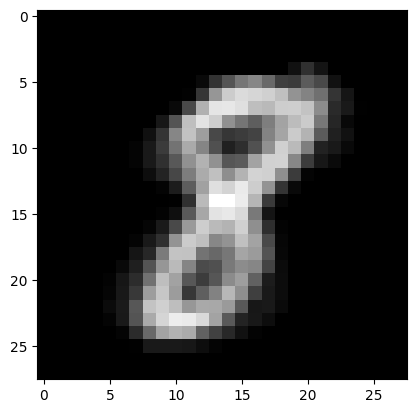

In [12]:
average = torch.mean(data_new[0:10,:,:], axis = 0) #Replace this with your code

try:
    plt.imshow(average, cmap='gray'); # expected output: a smoothened 8
    print(torch.allclose(average, average_comparison)) # expected True
    print(average.size()==(28,28)) # expected True
except TypeError as e:
    print("Need the average tensor of shape (28, 28)")

## Problem 2
Implement in the following cell using `torch.mm` or `torch.matmul` on `data_new` of a linear transformation with out bias to achieve the result of the following `for` loop. The `for` loop in the following cell can be modified to three lines of code with a reshape using `view` function, a matrix-matrix multiplication, reshape using `view` again.

Reference: https://pytorch.org/docs/stable/generated/torch.matmul.html

In [13]:
w0 = 0.25*torch.ones(28*28, 14*14)
n_samples = len(data_new)
X0 = data_new
X1 = torch.zeros(n_samples, 14*14)
for i in range(n_samples):
    sample = X0[i,:,:].reshape(-1)
    X1[i,:] = torch.matmul(sample, w0)
X2 = X1.view(-1,14,14)

In [135]:
X3 = X0.reshape(-1, 28*28)
X4 = (torch.matmul(X3, w0)).view(n_samples, 14, 14) # replace the torch.zeros here with matmul and X3
print(torch.allclose(X4, X2)) # expected output: True


True


## autograd


The `backward()` operation on any tensor `w` initialized with `requires_grad=True` will compute the gradient of `w`, and we can retrieve its gradient by `w.grad`. For example in the following cell, the gradient of $W^{T}$ is computed for
$$
L = \frac{1}{10}\sum_{i=1}^{10} 0.5*|W\boldsymbol{x}^{(i)} -y^{(i)} |^2
$$
where $\boldsymbol{x}^{(i)}$ is a 28*28 tensor that stands for the $i$-th sample.

In [14]:
torch.manual_seed(42)
n_samples = len(data_new)

# X[i] is a row vector representing a sample
X = data_new.view(-1, 28*28).clone()

# usually y[i] is the one-hot encoding label for i-th sample
# see https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
# y = F.one_hot(torch.tensor([8 for _ in range(n_samples)]), num_classes=10)
# here for simplicity we set y=0
y = torch.zeros(n_samples, 1)

# W is the weight matrix transposed
w = torch.randn((28*28, 1), requires_grad=True)
L = 0.5*(X.mm(w) - y).pow(2).mean()

# backprop
L.backward()

# gradient
with torch.no_grad():
    gradW = w.grad

X.shape

torch.Size([10, 784])

## Problem 3

Fill in the following cell an implementation of the backpropagation to compute
$$
\frac{\partial L}{ \partial (W^T)} = \frac{1}{10} \sum_{i=1}^{10}
(W\boldsymbol{x}^{(i)} -y^{(i)}) * \boldsymbol{x}^{(i)}
$$
using explicitly the matrix-vector multiplication `mm` and elementwise multiplication `*`. Then verify that the explicitly computed backpropagation gradient coincides with the `gradW` above.

Caveat: we may want to pay attention to the sizes of the vector being either `torch.size(28*28)` or `torch.Size(28*28, 1)`.

if we use a `for` loop, the code is as follows.

In the problem, your task is
- use a single line of code, to compute the gradient.

In [15]:
gradW1 = torch.zeros_like(w)
res = X.mm(w) - y
for i in range(n_samples):
  gradW1 += (res[i]*X[i,:]).view(-1,1)/n_samples

In [16]:
print(torch.allclose(gradW1, gradW)) # the manual computation agrees with the autograd

True


In [26]:
with torch.no_grad():
    gradW2 = ((res.T).mm(X)).view(-1,1) / n_samples # fill our code here
    gradW2 = gradW2.view(-1,1)

print(torch.linalg.norm(gradW2-gradW))
# this should be less than 1e-5 (single-precision error margin)

tensor(8.6513e-06)


## Problem 4 Conjugate gradient

A more efficient CG algorithm than the one presented in class is as follows (see the lecture notes)

The method of Conjugate Gradients for $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top} x$ is: given $x^{(0)}$, and let $d^{(0)} = -g^{[0]} = b - Qx^{(0)}$ where $g^{(k)} = \nabla f(x^{(k)})$

\begin{align*}
\text{for }  & k= 0, 1, \dots \qquad\\
\alpha^{(k)} &= \frac{(g^{(k)}, g^{(k)})}{(Qd^{(k)}, d^{(k)})}, \tag{1}
\\
x^{(k+1)} &= x^{(k)} + \alpha^{(k)}d^{(k)}, \\
g^{(k+1)} &= g^{(k)} + \alpha^{(k)}Qd^{(k)}, \tag{2} \\
\beta^{(k+1)} &= \frac{(g^{(k+1)}, g^{(k+1)})}{(g^{(k)}, g^{(k)})}, \tag{3}\\
d^{(k+1)} &= -g^{(k+1)} + \beta^{(k+1)}d^{(k)}. \tag{4}
\end{align*}

the code is as follows for the Q matrix defined as follows


In [18]:
from tqdm.auto import tqdm
import time

In [35]:
n = 40
I = torch.diag(torch.ones(n))
Q = 2*I - torch.diag(torch.ones(n-1), diagonal=1) - torch.diag(torch.ones(n-1), diagonal=-1)
# b = zero vector thus x^* should be zero
x = torch.randn(n) # random initial guess
g = Q@x # this is the same as torch.matmul(Q,x)
d = -g
num_iter = 40

In [36]:
# converges in O(n) steps
with tqdm(total=num_iter) as pbar:
  for k in range(num_iter):
      alpha = g@g/(d@(Q@d))
      x = x + alpha*d
      tmp = g@g # r_k dot with r_k
      g = g + alpha*(Q@d)
      d = -g + (g@g)/tmp*d
      pbar.set_description(f"g norm: {torch.linalg.norm(g):.5e} | d norm: {torch.linalg.norm(d):.5e}")
      time.sleep(0.2)
      pbar.update()

  0%|          | 0/40 [00:00<?, ?it/s]

If we run this algorithm too many times (if `num_iter` $ \gg n$), `d@(Q@d)` will be very small, dividing it yields overflow and outputs `nan`. Therefore, we need to implement a **stopping criterion**.

The stopping criterion commonly for CG is:
- if the norm of the gradient is smaller than a tolerance `tol`, then we exit the loop.
- if the maximum number of iteration is reached, then exit the loop.

This can be implemented using a `while` loop (an example is as follows) or `break` in the `for` loop. For this problem, you need

- Implement the stopping criterion for CG in the following cell.
- print the number of iterations when the algorithm stops, note each run of `x = x + alpha*d` counts as one iteration (of subspace search method).


In [37]:
k = 10
while k > 1e-4:
  print(k)
  k *= 0.2

10
2.0
0.4
0.08000000000000002
0.016000000000000004
0.003200000000000001
0.0006400000000000003
0.00012800000000000005


In [42]:
tol = 1e-5 # this is the tolerance

x = torch.arange(n)-n/2 # new initial guess
g = Q@x # this is the same as torch.matmul(Q,x)
d = -g

max_iter = 200
# copy the major body of CG code from above and implement the stopping criterion

n_iter = 0
with tqdm(total=max_iter) as pbar:
  while torch.linalg.norm(g) > tol and n_iter < max_iter:
      alpha = g@g/(d@(Q@d))
      x = x + alpha*d
      tmp = g@g # r_k dot with r_k
      g = g + alpha*(Q@d)
      d = -g + (g@g)/tmp*d
      pbar.set_description(f"Iteration {n_iter}, g norm: {torch.linalg.norm(g):.5e} | d norm: {torch.linalg.norm(d):.5e}")
      n_iter += 1
      time.sleep(0.1)
      pbar.update()
      if torch.linalg.norm(g) < tol:
        print(f'Stopped at iteration {n_iter - 1}')
        break

# expected output for the number of iterations when exiting: k=39

  0%|          | 0/200 [00:00<?, ?it/s]

Stopped at iteration 39
